# Transformers
_________________

* Single Head Attention



In [1]:
import numpy as np
import math

In [2]:
L , d_k ,d_v = 4 , 8 , 8                       # ex : MY NAME IS VISHNU   (4 TOKENS , 8 EMB_INPUTS)
q = np.random.randn(L,d_k)                     # (4 tOKENS, 8 ) MEANS 4*32 []
k = np.random.randn(L,d_k)
v = np.random.randn(L,d_v)


In [3]:
print(f"query is \n {q} \n key is \n{k}\n value is \n{v}")

query is 
 [[-1.90095263  1.83765277  0.90471949  0.66101561 -0.38493532 -0.80047479
   1.18211654  0.15855169]
 [-0.1885389  -0.720931   -0.80576139 -1.52432707 -0.55987821 -0.6772552
   0.67248354  0.55489563]
 [-0.65990667  0.72448649 -1.07604794  3.32877096 -0.33564932 -1.83575304
  -2.00610734 -0.67447697]
 [ 0.03383771  0.39694805 -0.40006685 -1.37877627 -1.57087537  1.49973801
  -0.16703687 -0.96230174]] 
 key is 
[[-0.69814913  0.22466816  2.61322359  1.39590355 -0.03379247 -0.84425483
  -0.07917867 -0.54363259]
 [ 0.98375551  1.15650741 -1.23537364  0.76656033  0.16923327 -1.54259013
   0.2617557  -0.32242701]
 [ 0.2931329  -0.06474021  0.30634026  0.33389385 -0.55933858 -0.92541553
  -1.0518952  -1.08158597]
 [-0.17128086  1.19744772 -0.73541517  1.04049487 -0.20726557  2.69209532
   0.28765021 -0.23106955]]
 value is 
[[ 1.31189526  0.98875805 -1.02810133 -0.8684312   1.23676342  0.05818182
   1.11261833  1.23095978]
 [ 1.00867066 -0.72524353 -0.13622887  1.0608211  -0.18279

In [4]:
print(f"query shape is \n {q.shape} \n key shape is \n{k.shape}\n value shape is \n{v.shape}")

query shape is 
 (4, 8) 
 key shape is 
(4, 8)
 value shape is 
(4, 8)


#                              SELF ATTENTION = SOFTMAX( Q.K^t /sqrt(d_k) +M ).V

In [5]:
np.matmul(q, k.T)           #we did Q.K^t

array([[ 5.53597918,  1.07219319, -0.63720978,  0.77675782],
       [-4.02800026, -0.24522027, -1.13203988, -3.46644095],
       [ 4.54486599,  6.53708325,  5.26777106, -0.05818453],
       [-3.58125795, -2.38309795,  0.10858664,  3.86647087]])



```

🗝️   that above code tells which word is given more attention  

                 MY          NAME          IS          VISHNU
   MY      |  1.43653262,  1.0171436 ,  0.13972415,  0.19629077 |

   NAME    | -3.34521573,  2.29924348, -4.14225686, -0.30506917 |

   IS      | -1.53196406, -3.60123916, -5.97975023, -1.47763195 |

   VISHNU  |  -3.05561153,  1.28169359, -3.3738232 ,  1.80997811|


```



In [6]:
# why we nedd sqrt (D_K) in denominator

q.var(), k.var(), np.matmul(q, k.T).var()

(np.float64(1.3492871304859908),
 np.float64(0.9757736794341133),
 np.float64(11.107958902059808))

🗝️ This Help us To Minimize That

   * you see there is query vector and k vector are approximatly same so need dk for that

In [7]:
scaled = np.matmul(q, k.T)/math.sqrt(d_k)
q.var(), k.var(), scaled.var()

(np.float64(1.3492871304859908),
 np.float64(0.9757736794341133),
 np.float64(1.3884948627574758))

see we minimize that

In [8]:
scaled

array([[ 1.95726421,  0.37907754, -0.22528768,  0.27462536],
       [-1.42411315, -0.08669846, -0.40023654, -1.22557195],
       [ 1.60685278,  2.31120795,  1.86243832, -0.02057134],
       [-1.26616589, -0.84255236,  0.03839118,  1.36700389]])

### MASKING

* 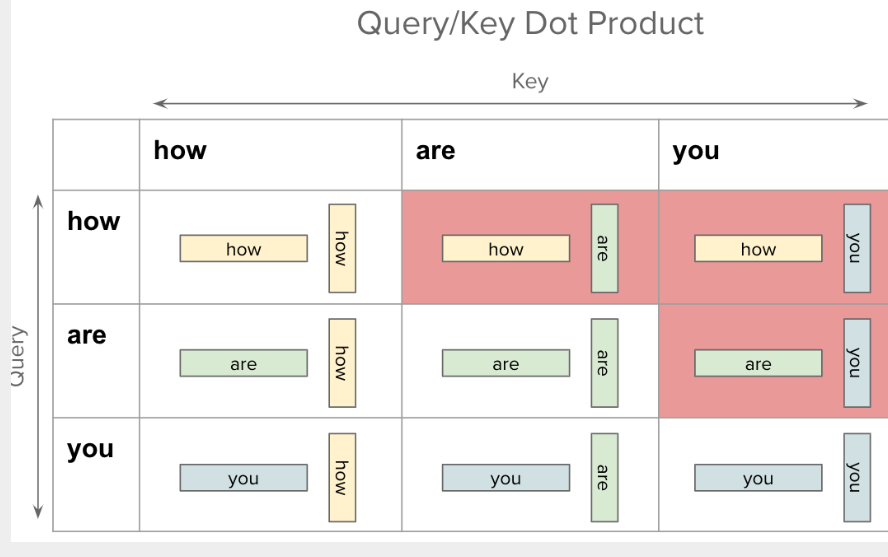


* here you see red area is masked

In [9]:
mask = np.tril(np.ones( (L, L)))
mask

array([[1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 1., 0.],
       [1., 1., 1., 1.]])

In [10]:
mask[mask == 0] = -np.inf
mask[mask == 1] = 0
mask


array([[  0., -inf, -inf, -inf],
       [  0.,   0., -inf, -inf],
       [  0.,   0.,   0., -inf],
       [  0.,   0.,   0.,   0.]])

In [11]:
# now
scaled + mask

array([[ 1.95726421,        -inf,        -inf,        -inf],
       [-1.42411315, -0.08669846,        -inf,        -inf],
       [ 1.60685278,  2.31120795,  1.86243832,        -inf],
       [-1.26616589, -0.84255236,  0.03839118,  1.36700389]])

🗝️ You see now you can understand from above image and this

#  

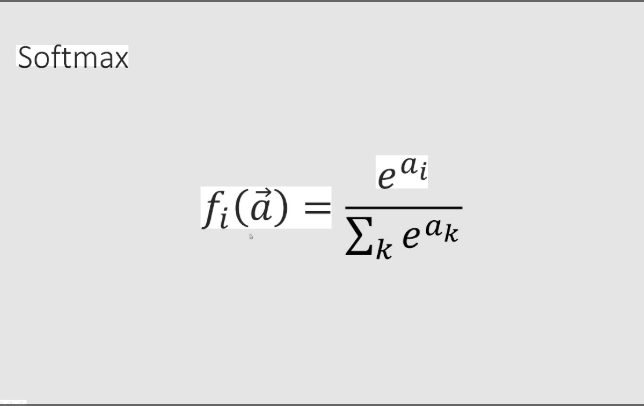


In [12]:
# lets create a function for this

def softmax(x):
  return (np.exp(x).T / np.sum(np.exp(x) , axis = -1)).T

In [13]:
attention = softmax(scaled + mask)
attention

array([[1.        , 0.        , 0.        , 0.        ],
       [0.20793553, 0.79206447, 0.        , 0.        ],
       [0.23181635, 0.46885833, 0.29932532, 0.        ],
       [0.04967378, 0.07587527, 0.18310035, 0.6913506 ]])

In [14]:
new_v = np.matmul(attention, v)


In [15]:
new_v

array([[ 1.31189526,  0.98875805, -1.02810133, -0.8684312 ,  1.23676342,
         0.05818182,  1.11261833,  1.23095978],
       [ 1.07172183, -0.3688417 , -0.32168084,  0.65966099,  0.11238076,
         0.07606709, -1.08246169, -0.16045793],
       [ 0.72055947, -0.03274915, -0.36538859, -0.46855362,  0.26465195,
        -0.18119729, -0.53273735, -0.29796151],
       [-0.08008594,  0.98626729, -1.69832244,  0.11349765,  0.49213799,
        -0.36616631,  0.6251474 , -0.26236276]])

In [32]:
import numpy as np
import math

def softmax(x):
    x = x - np.max(x, axis=-1, keepdims=True)
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

def scaled_dot_product(q, k, v, mask=None):
    d_k = q.shape[-1]

    # (L, d_k) @ (d_k, L) → (L, L)
    scaled = np.matmul(q, k.T) / math.sqrt(d_k)
    print("Scaled before mask:\n", scaled)

    if mask is not None:
        scaled = scaled + mask
        print("Scaled after mask:\n", scaled)

    attention = softmax(scaled)
    print("Attention:\n", attention)

    out = np.matmul(attention, v)
    return out, attention


# Example
L, d_k, d_v = 4, 8, 8
q = np.random.randn(L, d_k)
k = np.random.randn(L, d_k)
v = np.random.randn(L, d_v)

# Causal mask
mask = np.triu(np.ones((L, L)) * -1e9, k=1)

out, attention = scaled_dot_product(q, k, v, mask)


Scaled before mask:
 [[ 0.06926379  0.79373821 -1.3012526  -0.5191284 ]
 [-1.806671   -2.29877765  0.24069685  2.41654819]
 [ 0.24150774  0.3850227   1.19619745 -2.87890546]
 [-0.93512032  0.13587959  1.52384375  1.4402532 ]]
Scaled after mask:
 [[ 6.92637858e-02 -9.99999999e+08 -1.00000000e+09 -1.00000000e+09]
 [-1.80667100e+00 -2.29877765e+00 -1.00000000e+09 -9.99999998e+08]
 [ 2.41507744e-01  3.85022698e-01  1.19619745e+00 -1.00000000e+09]
 [-9.35120322e-01  1.35879589e-01  1.52384375e+00  1.44025320e+00]]
Attention:
 [[1.         0.         0.         0.        ]
 [0.62060258 0.37939742 0.         0.        ]
 [0.21042937 0.24290368 0.54666695 0.        ]
 [0.03792761 0.11068399 0.44347586 0.40791255]]
